In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from numpy import mean, std
%matplotlib inline

In [57]:
scaler = StandardScaler()

In [121]:
sns.set_style("whitegrid") #gridlines on seaborn plots

In [113]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['PassengerId']

In [60]:
#inspect the train data, look at the features!
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

## Feature: Pclass

<AxesSubplot:xlabel='Pclass', ylabel='count'>

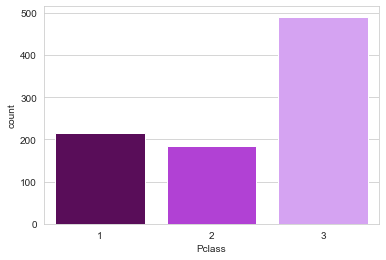

In [62]:
sns.countplot(data = train, x = 'Pclass', palette = ['#660066', '#be29ec', '#d896ff'])

Majority of passengers are 3rd class.

<AxesSubplot:xlabel='Survived', ylabel='count'>

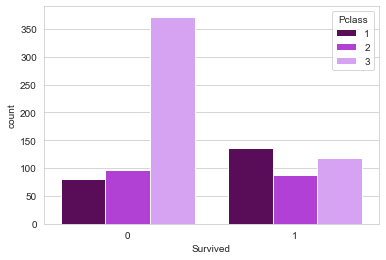

In [63]:
sns.countplot(data = train, x = 'Survived', hue = 'Pclass', palette = ['#660066', '#be29ec', '#d896ff'])

Looks as if 3rd class passengers have the lowest survival rate, with 1st class passengers having the highest. 

In [64]:
#the number of passengers in each passenger class
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [118]:
#the survival rate of 3rd class passengers
##Class 3 Passengers who survived/TOTAL Class 3 Passengers
train[(train['Pclass']==3) & (train['Survived']==1)].count()/train[train['Pclass']==3].count()

PassengerId    0.242363
Survived       0.242363
Pclass         0.242363
Name           0.242363
Sex            0.242363
Age            0.239437
SibSp          0.242363
Parch          0.242363
Ticket         0.242363
Fare           0.242363
Cabin          0.500000
Embarked       0.242363
dtype: float64

In [117]:
#the survival rate of 2nd class passengers
#Class 2 Passengers who survived/TOTAL Class 2 Passengers
train[(train['Pclass']==2) & (train['Survived']==1)].count()/train[train['Pclass']==2].count()

PassengerId    0.472826
Survived       0.472826
Pclass         0.472826
Name           0.472826
Sex            0.472826
Age            0.479769
SibSp          0.472826
Parch          0.472826
Ticket         0.472826
Fare           0.472826
Cabin          0.812500
Embarked       0.472826
dtype: float64

In [119]:
#the survival rate of 1st class passengers
#Class 1 Passengers who survived/TOTAL Class 1 Passengers
train[(train['Pclass']==1) & (train['Survived']==1)].count()/train[train['Pclass']==1].count()

PassengerId    0.629630
Survived       0.629630
Pclass         0.629630
Name           0.629630
Sex            0.629630
Age            0.655914
SibSp          0.629630
Parch          0.629630
Ticket         0.629630
Fare           0.629630
Cabin          0.664773
Embarked       0.626168
dtype: float64

### Some thoughts

 It seems as if the high class was given priority during the rescue period. Money/status have weight when it comes to survival. High class passenegers probably had better access to lifeboats.

 3rd Class passenger survival rate: 24.246%      
 2nd Class passenger survival rate: 47.283%           
 1st Class passenger survival rate: 62.963%

# Feature: Sex

Text(0.5, 1.0, 'Who Has Survived?')

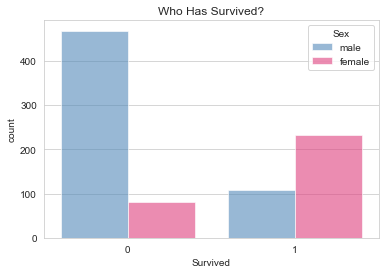

In [68]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette=['#428bca',"#FA2479"], alpha = .6)
plt.title('Who Has Survived?')

In [69]:
#male survival rate
train[(train['Sex']=='male') & (train['Survived']==1)].count()/train[train['Sex']== 'male'].count()

PassengerId    0.188908
Survived       0.188908
Pclass         0.188908
Name           0.188908
Sex            0.188908
Age            0.205298
SibSp          0.188908
Parch          0.188908
Ticket         0.188908
Fare           0.188908
Cabin          0.420561
Embarked       0.188908
dtype: float64

In [70]:
#female survival rate
train[(train['Sex']=='female') & (train['Survived']==1)].count()/train[train['Sex']== 'female'].count()

PassengerId    0.742038
Survived       0.742038
Pclass         0.742038
Name           0.742038
Sex            0.742038
Age            0.754789
SibSp          0.742038
Parch          0.742038
Ticket         0.742038
Fare           0.742038
Cabin          0.938144
Embarked       0.740385
dtype: float64

### Some thoughts

 Gender has weight when it comes to survival, women are much more likely to survive than men. Supports the 'women and children first' mentality when it comes to rescuing. 

 Male survival rate: 18.889%         
 Female survival rate: 74.204%

## Feature: Class and Gender

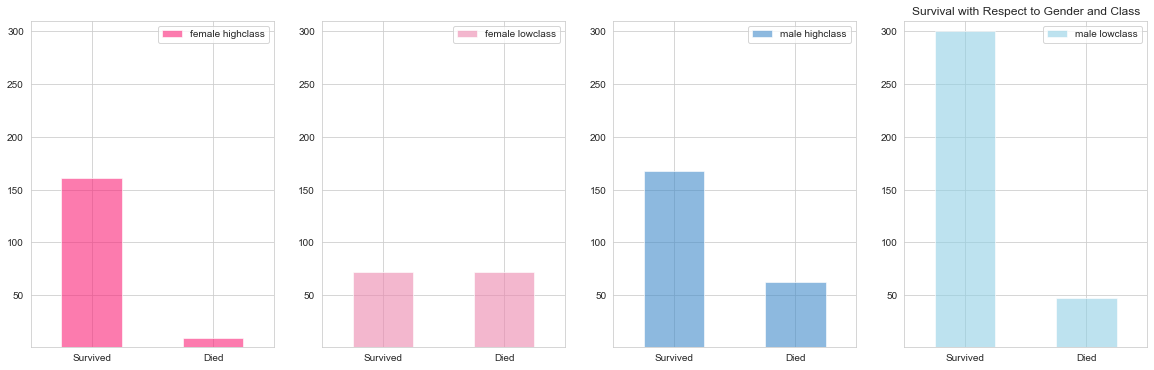

In [120]:
fig,axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,6))
#tuple unpacking, axes object is a list of matplotlib axes

plt.grid() #adds grid lines
plt.title('Survival with Respect to Gender and Class')

#bar graph of rate of survival among high class females
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(ax=axes[0], kind='bar', color='#FA2479', alpha = .6, label = 'female highclass')
axes[0].set_xticklabels(["Survived","Died"], rotation=0)
axes[0].set_ylim(1,310)
axes[0].legend(loc='upper right')

#bar graph of the survival among low class females
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(ax=axes[1], kind='bar', color='#ec87ae', alpha = .6, label = 'female lowclass')
axes[1].set_xticklabels(["Survived","Died"], rotation=0)
axes[1].set_ylim(1,310)
axes[1].legend(loc='upper right')

#bar graph of the survival among high class males
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(ax=axes[2], kind='bar', color='#428bca', alpha = .6, label = 'male highclass')
axes[2].set_xticklabels(["Survived","Died"], rotation=0)
axes[2].set_ylim(1,310)
axes[2].legend(loc='upper right')

#bar graph of the survival among low class males
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(ax=axes[3], kind='bar', color='#91d0e5', alpha = .6, label = 'male lowclass')
axes[3].set_xticklabels(["Survived","Died"], rotation=0)
axes[3].set_ylim(1,310)
axes[3].legend(loc='upper right')

### Some thoughts

 High class + female = best chance of survival. Rescue prioritizies those who are high class and/or women ("women and children first" mentality)

 Low class + male = worst chance of survival. Rescue did not prioritize men, and those men who were low class probably had little access to lifeboats

## Feature: Age

Text(0.5, 1.0, 'Passenger Age Distribution')

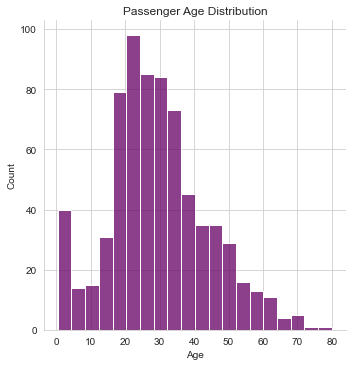

In [72]:
sns.displot(train['Age'], color = '#660066')
plt.title('Passenger Age Distribution')

Text(0.5, 1.0, 'Age Distribution of Passengers who Survived')

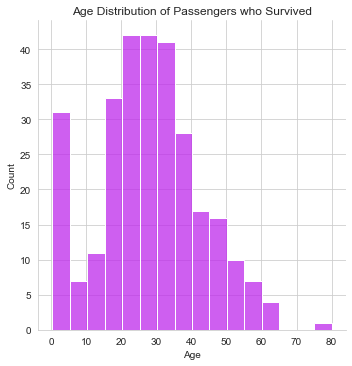

In [73]:
sns.displot(train[train['Survived'] == 1]['Age'], color = '#be29ec')
plt.title('Age Distribution of Passengers who Survived')

Left tail is a bit skewed upwards. Children are prioritized.

Text(0.5, 1.0, 'Age Distribution of Passengers Who Died')

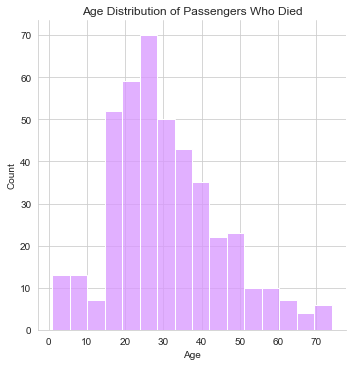

In [74]:
sns.displot(train[train['Survived'] == 0]['Age'], color = '#d896ff')
plt.title('Age Distribution of Passengers Who Died')

### Some thoughts

 All three graphs seem to follow a normal distribution. Possibly a range of ages in gender and and among passenger classes. 

Because of the 'women and children' first mentality, we see a spike in the left tail in the second dist plot. ~75% of children aged 0-5 survived.

# Data Cleaning

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

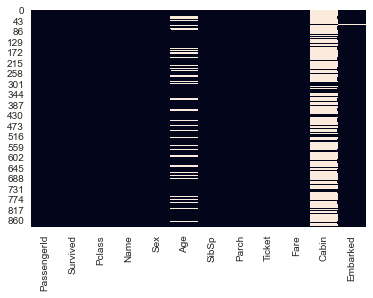

In [75]:
#visualize null values 
sns.heatmap(train.isnull(), cbar = False)
train.isnull().sum()

Only features with null values are Age, Cabin, and Embarked. 

In [76]:
#Dropped PassengerId, Name, Ticket, Embarked columns because they don't contribute much. 
#Cabin column has majority null values, so I dropped it as well.
#catgorized sex column and filled in any null values

def clean_data(data):
    data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
    cols = ['Age', 'SibSp', 'Parch', 'Fare']
    for col in cols:
        data[col].fillna(data[col].mean(), inplace = True)
    
    data = pd.get_dummies(data, columns=['Sex'], drop_first = True)
    
    return data

In [77]:
train = clean_data(train)
test = clean_data(test)

In [78]:
#check cleaned data
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [79]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


## Split Train Data using train_test_split

In [80]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [81]:
#check the shape of X
X.shape

(891, 6)

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Checking Logistical Regression Coefficients 

In [90]:
list(clf.coef_[0])

[-0.7906835408146462,
 -0.40684882091058283,
 -0.4168603850925283,
 0.14256015023973176,
 -1.2621717584775467]

In [89]:
X_train.columns.tolist()

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male']

In [91]:
pd.DataFrame(zip(X_train.columns.tolist(), clf.coef_[0]), columns=['feats','coef'])

,feats,coef
0,Pclass,-0.790684
1,Age,-0.406849
2,SibSp,-0.416860
3,Parch,0.142560
4,Fare,-1.262172


## Creating Logistical Regression Model (Parch column dropped)

In [83]:
#scale train data (fit and transform)
X_train_scaled = scaler.fit_transform(X_train.drop('Parch', axis =1))

In [84]:
#scaled train data into data frame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_male'])

In [85]:
X_train_scaled_df.head()

,Pclass,Age,SibSp,Fare,Sex_male
0,-1.614136,1.229207,-0.470722,-0.078684,0.724310
1,-0.400551,-0.503505,-0.470722,-0.377145,0.724310
2,0.813034,0.189580,-0.470722,-0.474867,0.724310
3,0.813034,-0.272477,0.379923,-0.476230,0.724310
4,0.813034,-1.812666,2.931860,-0.025249,-1.380624


Check the head of the scaled train data.

In [86]:
clf = LogisticRegression(random_state = 101, max_iter = 1000).fit(X_train_scaled, y_train)

In [87]:
#transform validation data, DONT FIT 
X_val_scaled = scaler.transform(X_val.drop('Parch', axis = 1))

In [88]:
#predict on validation data
pred = clf.predict(X_val_scaled)

## Classification Report for Logistical Regression (Parch column dropped)
train data scaled and transformed

test data transformed 

In [93]:
print('\nClassification Report\n', classification_report(y_val,pred))
print('\nConfusion Matrix\n', confusion_matrix(y_val,pred))


Classification Report
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix
 [[89 16]
 [21 53]]


In [94]:
print('MSE for Logistical Regression is', mean_squared_error(y_val,pred))

MSE for Logistical Regression is 0.20670391061452514


In [99]:
X_train_scaled = scaler.fit_transform(X_train.drop('Fare', axis = 1))

In [100]:
clf = LogisticRegression(random_state = 101, max_iter = 1000).fit(X_train_scaled, y_train)

In [101]:
X_val_scaled = scaler.transform(X_val.drop('Fare', axis = 1))

In [102]:
pred_2 = clf.predict(X_val_scaled)

## Classification Report for Logistical Regression (Fare column dropped)

In [103]:
print('\nClassification Report\n', classification_report(y_val,pred_2))
print('\nConfusion Matrix\n', confusion_matrix(y_val,pred_2))


Classification Report
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix
 [[92 13]
 [19 55]]


In [104]:
print('The MSE is', mean_squared_error(y_val, pred_2))

The MSE is 0.1787709497206704


In [107]:
test_scaled = scaler.transform(test.drop('Parch', axis = 1))

In [108]:
submission_pred = clf.predict(test_scaled)

In [109]:
df = pd.DataFrame(
                  {'Survived': submission_pred}
                 )
                  
df_2 = pd.DataFrame(
                    {'PassengerId': test_ids.values}
                    )

df_3 = pd.concat([df_2, df], axis = 1)

In [111]:
#submission created! :)
df_3.to_csv('submission.csv', index = False)

## Some Commentaries while Doing This Project

It seems as if dropping the 'Parch' column made for a more accurate model than dropping the 'Fare' column. This makes sense given that the coeff for 'Parch' is much smaller than 'Fare'.

Dropping columns doesn't seem to increase model accuracy after a certain point, need to feature engineer

If there is an error, break your code up into smaller pieces and run each piece until you find that error

ALWAYS check your the head of your dataframes after you manipulate them

Intepreting Logistical Regression coeffs is a lot more complicated than Linear Regression coeffs

## What I Learned While Doing This Project

The outline of creating a machine learning model (creating a train and a test set)

How to interpret a confusion matrix and learning what Type I (false positive) and Type II (false negative) errors are 

How to clean/wrangle/manipulate data and filling in null values of a dataframe

Too low of an MSE indicates an overfit model (aka the model will do terribly on used actual data)

How to draw meaningful insights from EDA (eg. looking at the countplots of men and women who survived, women are MUCH more likely to survive than men)

How to do conditional selection in pandas dataframes

Learning to read through the noise of Stack Overflow to understand the solution I'm looking at

The importance of commenting on your code (readability is so important!! you may understand your code now, but future you might not)

# *This project is still a work in progress, I am aiming for the top 50% on the Kaggle leaderboard. I'm happy with the progress I've made, but I'm not done yet. Stay tuned!*